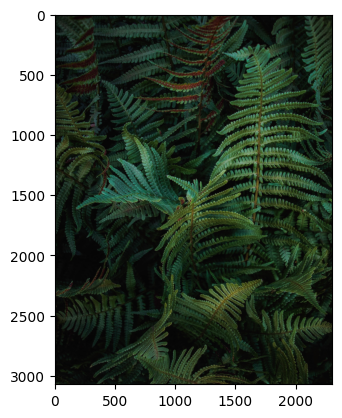

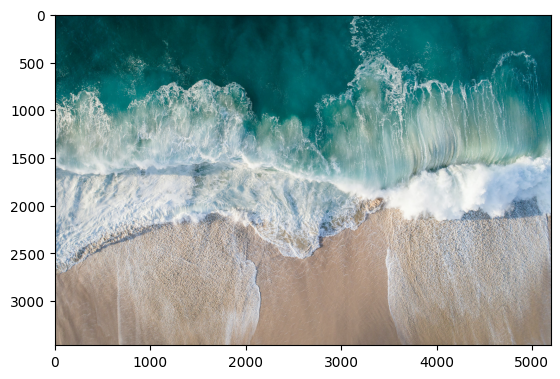

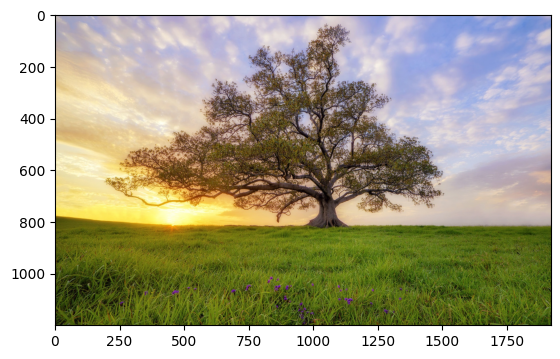

In [24]:
# display all the jpeg images in the test_images folder
# using matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# get the list of all the files in the test_images folder
files = os.listdir('test_images')

# loop through the files and display the images using matplotlib
for file in files:
    if file.endswith('.jpg'):
        img = mpimg.imread('test_images/' + file)
        imgplot = plt.imshow(img)
        plt.show()

In [33]:
import glob
from os import path, remove
import random
import string

from main import embed,extract


def run_embed():
    files = glob.glob("test_images/*.jpg")
    for file in files:
        # generate a random text to embed
        text = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(10))
        filename = path.splitext(path.basename(file))[0]
        output_file = f"test_images/output/{filename}_stego.png"
        if path.exists(output_file):
            remove(output_file)
        print(f"Embedding the Message in {file} and saving it as {output_file}")
        embed(file, output_file, text , "password", 42)
        print("Encoded Message: " + text)
        

def run_extract():
    #find all the stego images in the output folder
    files = glob.glob("test_images/output/*_stego.png")
    for file in files:
        filename = path.splitext(path.basename(file))[0]
        print(f"Extracting the Message from {file}")
        print("Encoded message in cover image {} is -> {} " .format(filename, extract(file, "password", 42)))



In [32]:
run_embed()
run_extract()

Extracting the Message from test_images/output/1_stego.png
3LHNPBGB7A
Encoded message in cover image 1_stego is -> 3LHNPBGB7A 
Extracting the Message from test_images/output/2_stego.png
BRCL472RL1
Encoded message in cover image 2_stego is -> BRCL472RL1 
Extracting the Message from test_images/output/0_stego.png
6HW1HS57TC
Encoded message in cover image 0_stego is -> 6HW1HS57TC 


In [42]:
import numpy as np
import scipy.spatial.distance as dist
from PIL import Image

def check_difference(cover_image_list,encode_image_list):
    
    plt.figure(1,figsize=(10,10))
    for img,encoded_img in zip(cover_image_list,encode_image_list):
        im1 = Image.open(img)
        im2 = Image.open(encoded_img)
        im1_array=np.array(im1).reshape(-1)
        im2_array=np.array(im2).reshape(-1)
        sim = 1 - np.abs(dist.cosine(im1_array, im2_array))
        print("Cosine similarity between {} cover image and encoded image is {}".format(img,sim))       

check_difference(["test_images/1.jpg","test_images/0.jpg"],["test_images/output/1_stego.png","test_images/output/0_stego.png"])

Cosine similarity between test_images/1.jpg cover image and encoded image is 0.9980439793341522
Cosine similarity between test_images/0.jpg cover image and encoded image is 0.9945216232179246


<Figure size 1000x1000 with 0 Axes>

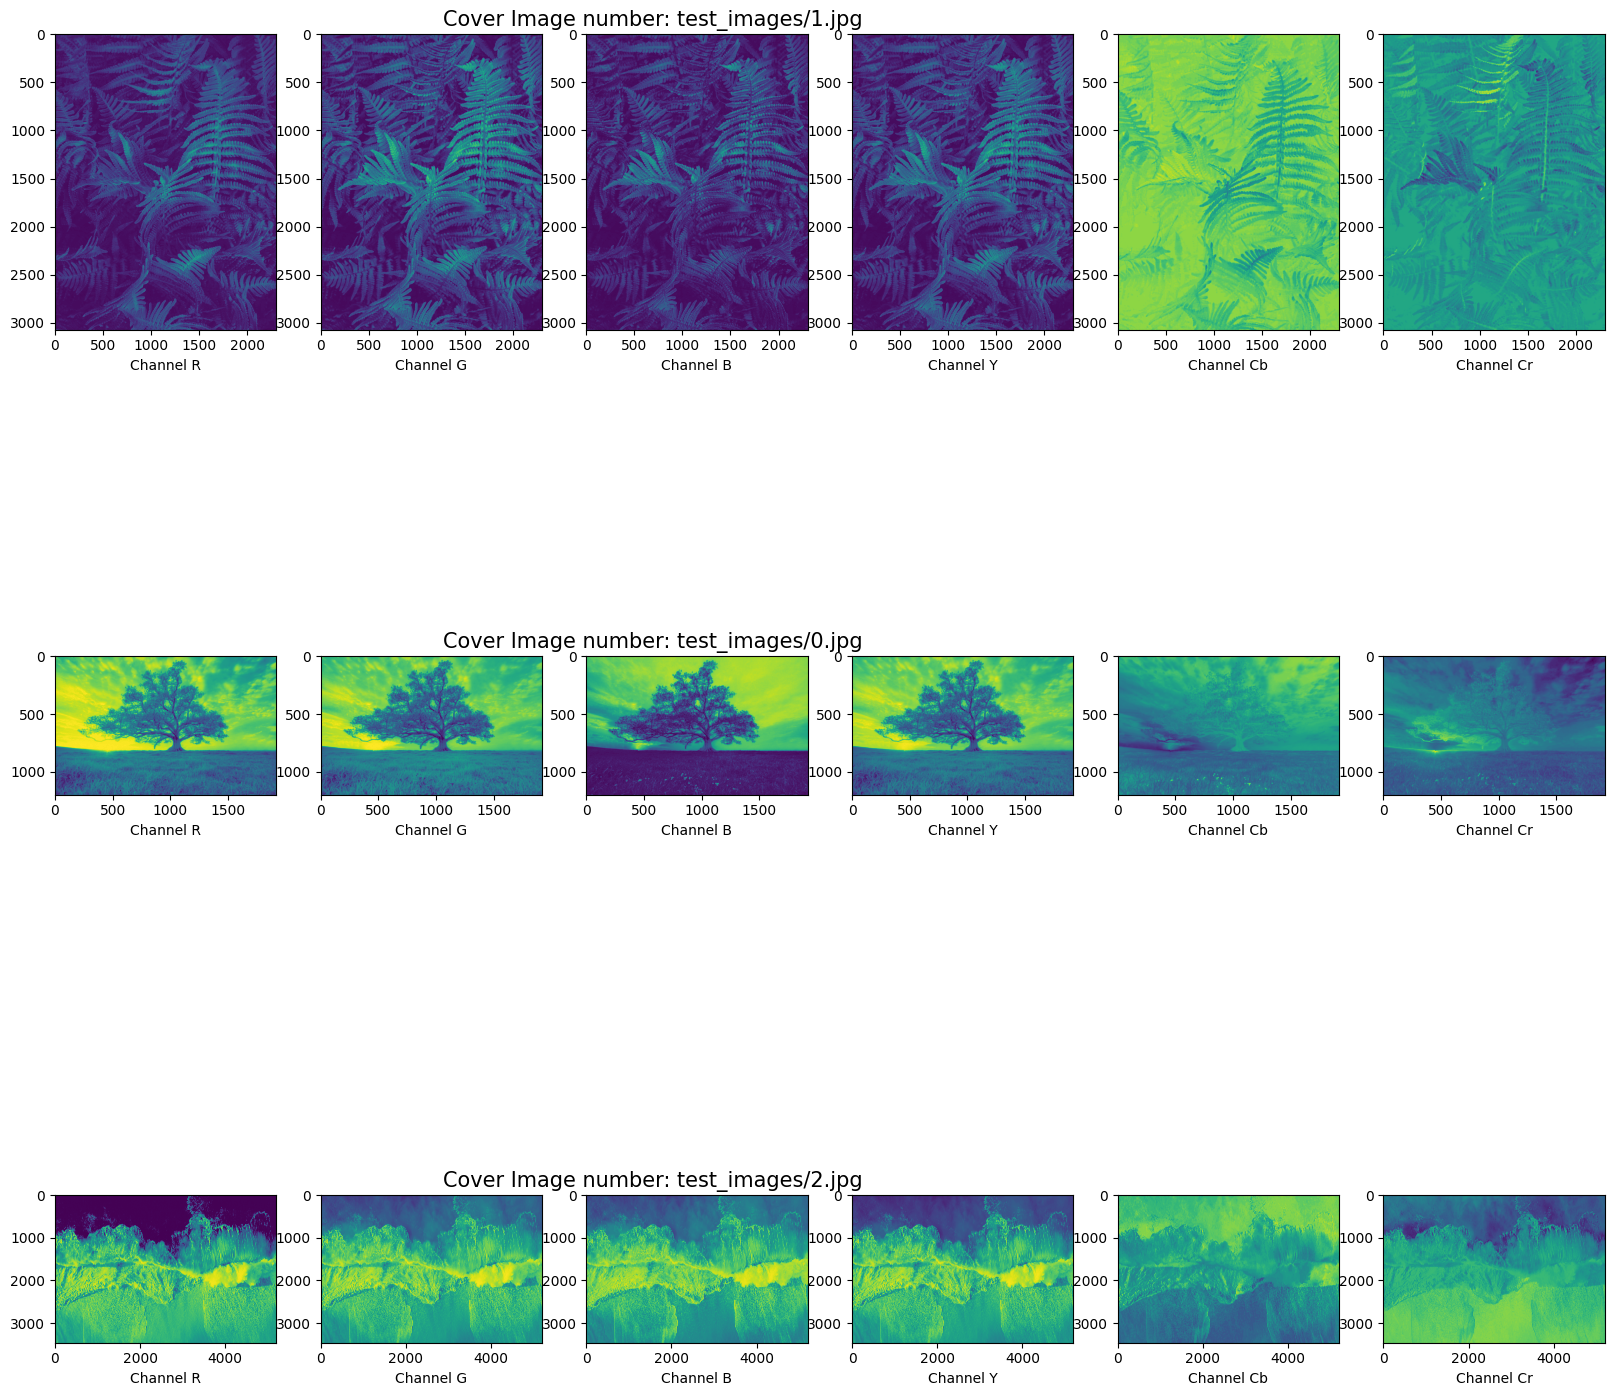

In [48]:
cover_image_list = ["test_images/1.jpg", "test_images/0.jpg", "test_images/2.jpg"]


def YCbCr_channel(cover_image_list, title):
    fig, axes = plt.subplots(
        ncols=6, nrows=cover_image_list.__len__(), figsize=(20, 20)
    )
    for i, img in enumerate(cover_image_list):
        im1 = Image.open(img)
        im1_ycbcr = im1.convert("YCbCr")
        y1, cb1, cr1 = im1_ycbcr.split()
        r, g, b = im1.split()
        axes[i][0].imshow(r)
        axes[i][0].set_xlabel("Channel R")
        axes[i][1].imshow(g)
        axes[i][1].set_xlabel("Channel G")
        axes[i][2].imshow(b)
        axes[i][2].set_xlabel("Channel B")
        axes[i][3].imshow(y1)
        axes[i][3].set_xlabel("Channel Y")
        axes[i][4].imshow(cb1)
        axes[i][4].set_xlabel("Channel Cb")
        axes[i][5].imshow(cr1)
        axes[i][5].set_xlabel("Channel Cr")

    for ax, row in zip(axes[:, 0], cover_image_list):
        ax.set_title(title.format(row), size=15, x=2.7, y=1.0)


YCbCr_channel(cover_image_list, title="Cover Image number: {}")
